# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). Especially around -20, and +20 we can observe the highest levels of temperatures. Latitude and temperature is correlated with bell curve. As it can on"LatvsTRemperature.png". More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import wapi_key

# Settings
settings = {"units":"imperial","appid":wapi_key}

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities_df = pd.DataFrame({'city':cities})
cities_df.head()

,city
0,busselton
1,albany
2,iqaluit
3,ilulissat
4,kununurra


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_data = []

# API calls and store the response into a list
for index, row in cities_df.iterrows():
    # Try to grab weather information if they are available in OpenWeatherMap
    try:
        weather_data.append(ow.get_current(row[0],**settings))
        print(f'Processing Record {index} city: {row[0]} ! Appending weather')
        
    # Handle exceptions for not available cities
    except:
        print(f'city {row[0]} not found. Skipping...')
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Processing Record 0 city: busselton ! Appending weather
Processing Record 1 city: albany ! Appending weather
Processing Record 2 city: iqaluit ! Appending weather
Processing Record 3 city: ilulissat ! Appending weather
Processing Record 4 city: kununurra ! Appending weather
Processing Record 5 city: ushuaia ! Appending weather
Processing Record 6 city: namibe ! Appending weather
Processing Record 7 city: ancud ! Appending weather
Processing Record 8 city: kisangani ! Appending weather
Processing Record 9 city: hilo ! Appending weather
Processing Record 10 city: jabinyanah ! Appending weather
Processing Record 11 city: dikson ! Appending weather
Processing Record 12 city: cutervo ! Appending weather
Processing Record 13 city: yafran ! Appending weather
Processing Record 14 city: ponta do sol ! Appending weather
Processing Record 15 city: pevek ! Appending weather
Processing Record 16 city: puerto ayora ! Appending weather
Processing Record 17 city: congonhas ! Appending weather
Processi

Processing Record 152 city: isangel ! Appending weather
Processing Record 153 city: voiron ! Appending weather
Processing Record 154 city: zyryanka ! Appending weather
Processing Record 155 city: amapa ! Appending weather
Processing Record 156 city: nome ! Appending weather
Processing Record 157 city: svetlogorsk ! Appending weather
Processing Record 158 city: huntsville ! Appending weather
Processing Record 159 city: grand gaube ! Appending weather
Processing Record 160 city: pushkinskiye gory ! Appending weather
Processing Record 161 city: kachhwa ! Appending weather
Processing Record 162 city: vostok ! Appending weather
Processing Record 163 city: mount gambier ! Appending weather
Processing Record 164 city: thinadhoo ! Appending weather
Processing Record 165 city: bredasdorp ! Appending weather
city saleaula not found. Skipping...
Processing Record 167 city: pangnirtung ! Appending weather
Processing Record 168 city: santiago ! Appending weather
Processing Record 169 city: puteyets

city bolungarvik not found. Skipping...
Processing Record 302 city: westport ! Appending weather
Processing Record 303 city: ambilobe ! Appending weather
Processing Record 304 city: upernavik ! Appending weather
city marcona not found. Skipping...
Processing Record 306 city: gat ! Appending weather
Processing Record 307 city: ambon ! Appending weather
Processing Record 308 city: mbour ! Appending weather
Processing Record 309 city: new norfolk ! Appending weather
Processing Record 310 city: naze ! Appending weather
Processing Record 311 city: mokokchung ! Appending weather
Processing Record 312 city: goiatuba ! Appending weather
Processing Record 313 city: vila franca do campo ! Appending weather
Processing Record 314 city: ossora ! Appending weather
Processing Record 315 city: klyuchi ! Appending weather
Processing Record 316 city: garhi khairo ! Appending weather
Processing Record 317 city: vyshkov ! Appending weather
Processing Record 318 city: pasighat ! Appending weather
Processin

Processing Record 449 city: henties bay ! Appending weather
Processing Record 450 city: garoua ! Appending weather
Processing Record 451 city: moissala ! Appending weather
Processing Record 452 city: humaita ! Appending weather
Processing Record 453 city: buraydah ! Appending weather
Processing Record 454 city: duliagaon ! Appending weather
Processing Record 455 city: port-cartier ! Appending weather
Processing Record 456 city: biak ! Appending weather
Processing Record 457 city: valdivia ! Appending weather
Processing Record 458 city: pisco ! Appending weather
Processing Record 459 city: vyritsa ! Appending weather
Processing Record 460 city: formosa ! Appending weather
Processing Record 461 city: malanje ! Appending weather
Processing Record 462 city: nouadhibou ! Appending weather
Processing Record 463 city: marblehead ! Appending weather
Processing Record 464 city: aktas ! Appending weather
Processing Record 465 city: zarumilla ! Appending weather
Processing Record 466 city: matara

Processing Record 600 city: kiunga ! Appending weather
Processing Record 601 city: margate ! Appending weather
Processing Record 602 city: khani ! Appending weather
--------------------------
Data Retrieval Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create lists to store relevant data
city = []
country = []
date = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop thru the response list
for i in range(len(weather_data)):
    city.append(weather_data[i]['name'])
    date.append(weather_data[i]['dt'])
    country.append(weather_data[i]['sys']['country'])
    lat.append(weather_data[i]['coord']['lat'])
    lon.append(weather_data[i]['coord']['lon'])
    temp_max.append(weather_data[i]['main']['temp_max'])
    humidity.append(weather_data[i]['main']['humidity'])
    cloudiness.append(weather_data[i]['clouds']['all'])
    wind_speed.append(weather_data[i]['wind']['speed'])

# Convert raw data to DataFrame
weather_df = pd.DataFrame({"City" : city,
                           "Cloudiness": cloudiness,
                           "Country":country,
                           "Date": date,
                           "Humidity" : humidity,
                           "Lat": lat,
                           "Lng": lon,
                           "Max Temp": temp_max,
                           "Wind Speed": wind_speed})
weather_df.head()

# Export the data into csv
weather_df.to_csv('weather_data.csv',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

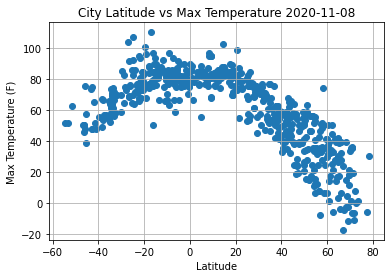

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature {datetime.today().date()}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsTemperature.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

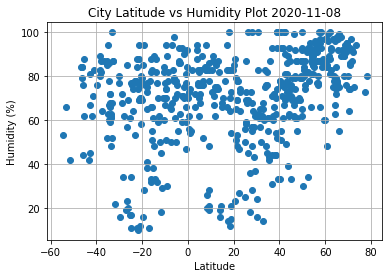

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity Plot {datetime.today().date()}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsHumidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

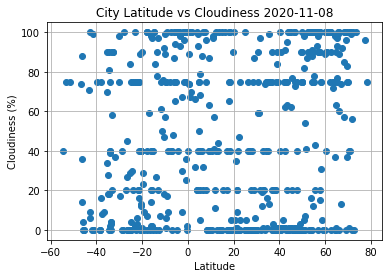

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness {datetime.today().date()}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsCloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

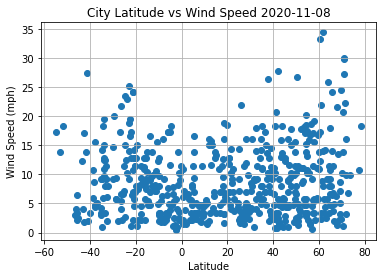

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed {datetime.today().date()}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/LatvsWindSpeed.png')

# Show plot
plt.show()

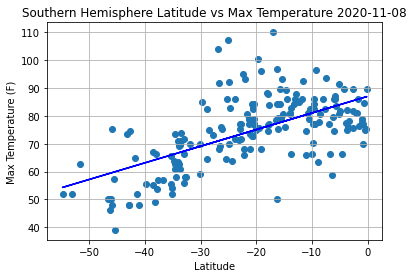

In [23]:
# Southern Hemisphere vs Max Temp
south_hemisphere = weather_df.loc[weather_df['Lat'] < 0]

# Assign x , y values
x_val = south_hemisphere['Lat']
y_val = south_hemisphere['Max Temp']

# Perform linear regreession
s_slope, s_int, s_r, s_p, s_err = st.linregress(x_val, y_val)
s_fit = x_val * s_slope + s_int

plt.scatter(x_val,y_val)
plt.plot(x_val,s_fit,"b-")


plt.title(f'Southern Hemisphere Latitude vs Max Temperature {datetime.today().date()}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/SouthLatvsTemp.png')

# Show plot
plt.show()


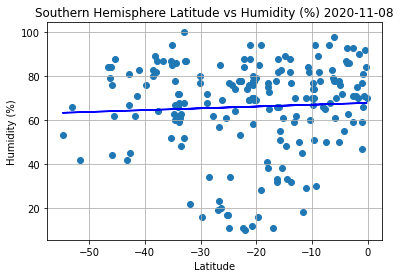

In [24]:
# Assign x , y values
x_val = south_hemisphere['Lat']
y_val = south_hemisphere['Humidity']

# Perform linear regreession
s_slope, s_int, s_r, s_p, s_err = st.linregress(x_val, y_val)
s_fit = x_val * s_slope + s_int

plt.scatter(x_val,y_val)
plt.plot(x_val,s_fit,"b-")

plt.title(f'Southern Hemisphere Latitude vs Humidity (%) {datetime.today().date()}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/SouthLatvsHumidity.png')

# Show plot
plt.show()


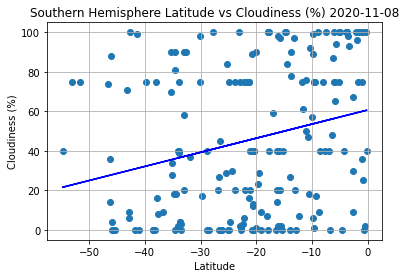

In [25]:
# Assign x , y values
x_val = south_hemisphere['Lat']
y_val = south_hemisphere['Cloudiness']

# Perform linear regreession
s_slope, s_int, s_r, s_p, s_err = st.linregress(x_val, y_val)
s_fit = x_val * s_slope + s_int

plt.scatter(x_val,y_val)
plt.plot(x_val,s_fit,"b-")

plt.title(f'Southern Hemisphere Latitude vs Cloudiness (%) {datetime.today().date()}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/SouthLatvsCloudiness.png')

# Show plot
plt.show()

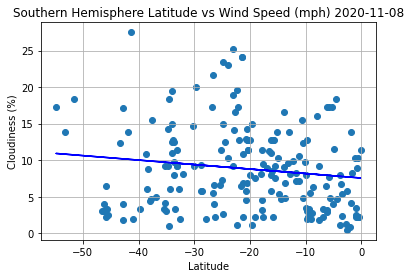

In [32]:
# Assign x , y values
x_val = south_hemisphere['Lat']
y_val = south_hemisphere['Wind Speed']

# Perform linear regreession
s_slope, s_int, s_r, s_p, s_err = st.linregress(x_val, y_val)
s_fit = x_val * s_slope + s_int

plt.scatter(x_val,y_val)
plt.plot(x_val,s_fit,"b-")

plt.title(f'Southern Hemisphere Latitude vs Wind Speed (mph) {datetime.today().date()}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/SouthLatvsWindSpeed.png')

# Show plot
plt.show()

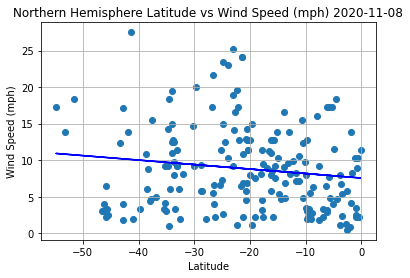

In [27]:
# Set latitude for Northern Hemisphere 
north_hemisphere = weather_df.loc[weather_df['Lat'] < 0]

# Assign x , y values
x_val = north_hemisphere['Lat']
y_val = north_hemisphere['Wind Speed']

# Perform linear regreession
n_slope, n_int, n_r, n_p, n_err = st.linregress(x_val, y_val)
n_fit = x_val * n_slope + n_int

plt.scatter(x_val,y_val)
plt.plot(x_val,n_fit,"b-")

plt.title(f'Northern Hemisphere Latitude vs Wind Speed (mph) {datetime.today().date()}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/NorthLatvsWindSpeed.png')

# Show plot
plt.show()

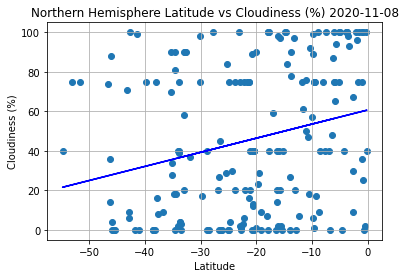

In [28]:
# Assign x , y values
x_val = north_hemisphere['Lat']
y_val = north_hemisphere['Cloudiness']

# Perform linear regreession
n_slope, n_int, n_r, n_p, n_err = st.linregress(x_val, y_val)
n_fit = x_val * n_slope + n_int

plt.scatter(x_val,y_val)
plt.plot(x_val,n_fit,"b-")

plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%) {datetime.today().date()}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/NorthLatvsCloudiness.png')

# Show plot
plt.show()

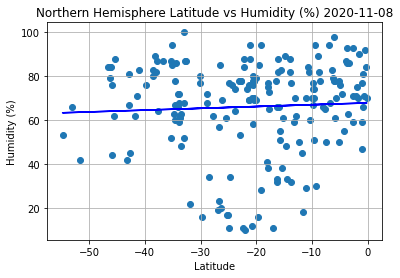

In [29]:
# Assign x , y values
x_val = north_hemisphere['Lat']
y_val = north_hemisphere['Humidity']

# Perform linear regreession
n_slope, n_int, n_r, n_p, n_err = st.linregress(x_val, y_val)
n_fit = x_val * n_slope + n_int

plt.scatter(x_val,y_val)
plt.plot(x_val,n_fit,"b-")

plt.title(f'Northern Hemisphere Latitude vs Humidity (%) {datetime.today().date()}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/NorthLatvsHumidity.png')

# Show plot
plt.show()

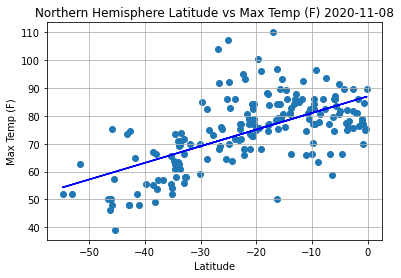

In [30]:
# Assign x , y values
x_val = north_hemisphere['Lat']
y_val = north_hemisphere['Max Temp']

# Perform linear regreession
n_slope, n_int, n_r, n_p, n_err = st.linregress(x_val, y_val)
n_fit = x_val * n_slope + n_int

plt.scatter(x_val,y_val)
plt.plot(x_val,n_fit,"b-")

plt.title(f'Northern Hemisphere Latitude vs Max Temp (F) {datetime.today().date()}')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid('True')

# Save the figure
plt.savefig('figures/NorthLatvsMaxTemp.png')

# Show plot
plt.show()